# Модульна контрольна робота

**Дисципліна**: *Комп'ютерна графіка*

**Студент**: Мелоян Мирослав  
**Група**: ФІ-21  
**Варіант**: 14(5)

## Завдання

**Мета роботи**: Визначити фрактальну розмірність фрактала, що складається з тих точок відрізка [0; 1], в п'ятірковому представленні яких відсутні цифри 1, 2 та 4. Розробити програмне забезпечення для побудови даного фрактала. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Функція `is_valid(n, b)`
Ця функція перевіряє, чи не містить число `n` у заданій системі числення `b` заборонені цифри 1, 2, або 4.

**Параметри:**
- `n`: Число для перевірки.
- `b`: Основа системи числення, у якій ведеться перевірка.

**Повертає:**
- `True` або `False` залежно від того, чи задовольняє число умовам.

### Функція `gen_nums(b, prec)`
Створює список чисел без цифр 1, 2, 4 в їх представленні у системі з основою `b` до заданої точності `prec`. Ці числа використовуються для фракталів.

**Параметри:**
- `b`: Основа системи числення, в якій ведеться генерація.
- `prec`: Точність або кількість знаків, які будуть генеруватися.

**Повертає:**
- Список чисел, які можна використовувати для побудови фракталів. 

In [2]:
def is_valid(n, b):
    """ Перевірка числа на наявність цифр 1, 2, 4. """
    while n > 0:
        d = n % b
        if d in [1, 2, 4]:
            return False
        n //= b
    return True

def gen_nums(b, prec):
    """ Генерація валідних чисел. """
    valids = []
    total = b ** prec
    for i in range(total):
        if is_valid(i, b):
            val = i / (b ** prec)
            if is_valid(int(val * b ** prec), b):
                valids.append(val)
    return valids 

In [3]:
precision = 5
fractions = gen_nums(5, precision)  
print("Перші 10 дробів:", fractions [:10])

Перші 10 дробів: [0.0, 0.00096, 0.00576, 0.024, 0.02496, 0.0288, 0.02976, 0.12, 0.12096, 0.1248]


### Функція `dec_to_base(num, base)`
Перетворює число `num` з десяткової системи в систему з основою `base`. 

In [4]:
def dec_to_base(num, base):
    if num == 0:
        return '0'
    digs = []
    while num:
        digs.append(int(num % base))
        num //= base
    return ''.join(str(x) for x in reversed(digs))  

In [5]:
for fraction in fractions[:10]:
    base_5_representation = dec_to_base(int(fraction * 5**precision), 5)
    print(f'Decimal: {fraction}, Base-5: {base_5_representation}') 

Decimal: 0.0, Base-5: 0
Decimal: 0.00096, Base-5: 3
Decimal: 0.00576, Base-5: 33
Decimal: 0.024, Base-5: 300
Decimal: 0.02496, Base-5: 303
Decimal: 0.0288, Base-5: 330
Decimal: 0.02976, Base-5: 333
Decimal: 0.12, Base-5: 3000
Decimal: 0.12096, Base-5: 3003
Decimal: 0.1248, Base-5: 3030


### Функція `frac_dim(d, max_r=None, steps=100)`
Обчислює фрактальну розмірність набору точок `d`. Для кожного радіуса з зазначеного діапазону (від 0.01 до `max_r` або до 0.5 за замовчуванням) рахує, скільки пар точок мають відстань меншу за цей радіус. Використовує логарифмічну регресію для визначення нахилу, який є фрактальною розмірністю.

**Параметри:**
- `d`: Масив точок для обчислення.
- `max_r`: Максимальний радіус для визначення відстаней (стандартно 0.5).
- `steps`: Кількість кроків для розрахунку, точність обчислень.

**Повертає:**
- Значення фрактальної розмірності, яке визначається як нахил регресійної лінії. 

In [6]:
def frac_dim(d, max_r=None, steps=100):
    d = np.array(d)
    len_d = len(d)
    
    if max_r is None:
        max_r = 0.5
    
    rs = np.linspace(0.01, max_r, steps)
    cs = []
    
    for r in rs:
        c = 0
        for i in range(len_d):
            for j in range(len_d):
                if np.abs(d[i] - d[j]) < r:
                    c += 1
        cs.append(c / (len_d * (len_d - 1)))
    
    cs = np.array(cs)
    log_r = np.log(rs)
    log_c = np.log(cs)
    
    slope, _ = np.polyfit(log_r, log_c, 1)
    return slope

In [7]:
dimension = frac_dim(fractions)
print("Фрактальна розмірність:", dimension) 

Фрактальна розмірність: 0.3603011303340974


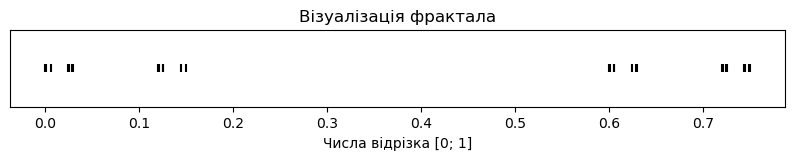

In [8]:
def visualize_fractions(fractions):
    """ Візуалізація точок фрактала. """
    plt.figure(figsize=(10, 1))
    plt.scatter(fractions, [1] * len(fractions), marker='|', color='k')
    plt.yticks([])
    plt.title('Візуалізація фрактала')
    plt.xlabel('Числа відрізка [0; 1]')
    plt.show()

visualize_fractions(fractions)